## imports

In [1]:
market = 'EWR-CDG'

In [2]:
import datetime
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_INPUT_DIR = "../../../data/carrier-consistency"
cxr_data_types = ["ow_out_cxr_crude", "ow_out_cxr_nuanced", "rt_out_cxr_crude", "rt_out_cxr_nuanced", "rt_in_cxr_crude"]

# one-ways (out-bound)

In [4]:
data_idx = 0
print(cxr_data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{cxr_data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

ow_out_cxr_crude


In [5]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

In [6]:
m_df = df[df['market'] == market]

## overall summary by carrier

In [7]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

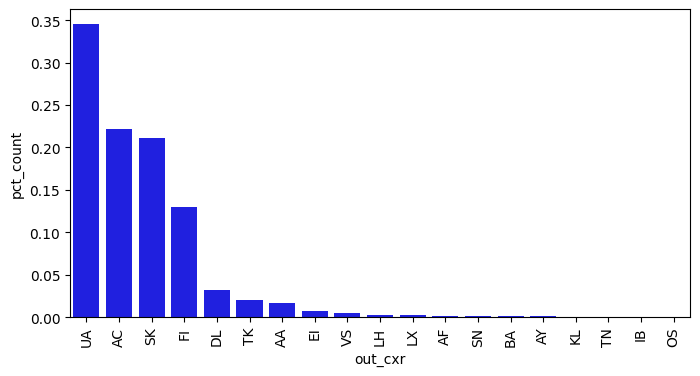

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [9]:
# top_n_cxr = 5
# top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

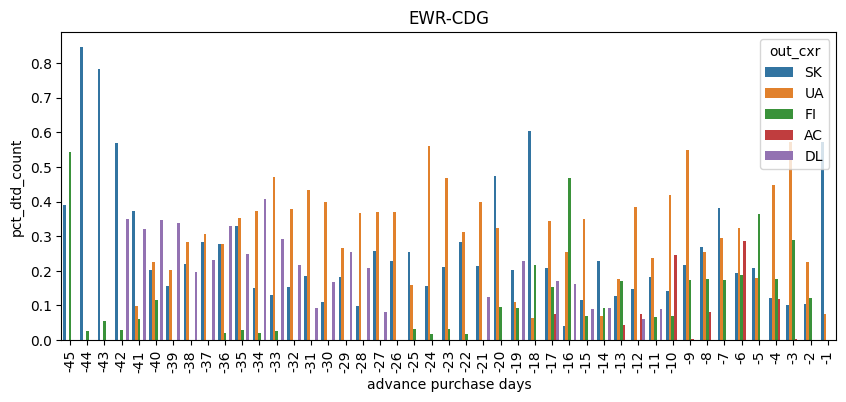

In [11]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum',})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

### aside: revamp from overlay to small multiples

In [ ]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg({'count': 'sum'})
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]

In [12]:
plot_data.head()

,days_til_dept,out_cxr,count,dtd_rank,dtd_count,pct_dtd_count
2,1,SK,680,1.0,1188,0.572391
5,1,UA,91,4.0,1188,0.076599
11,2,UA,284,2.0,1254,0.226475
7,2,FI,153,3.0,1254,0.122010
8,2,SK,132,4.0,1254,0.105263


In [14]:
import matplotlib.cm as cm

In [15]:
# colors = 
cmap_name = "viridis_r"
colors = [cm.get_cmap(cmap_name)(x) for x in np.linspace(0, 1, top_n_cxr)]

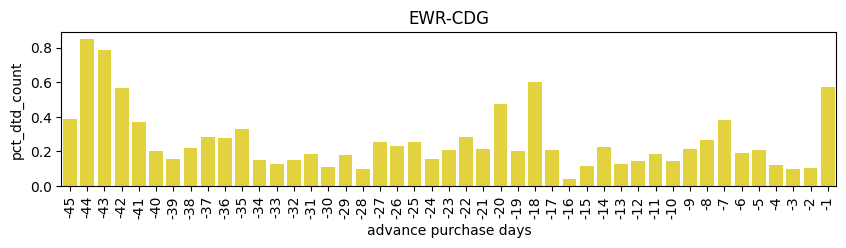

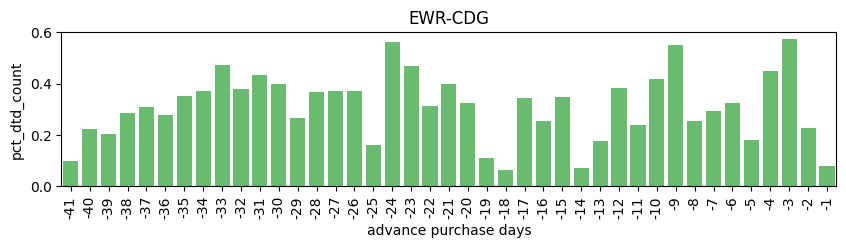

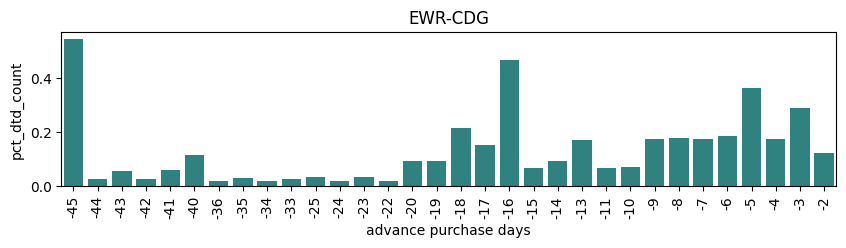

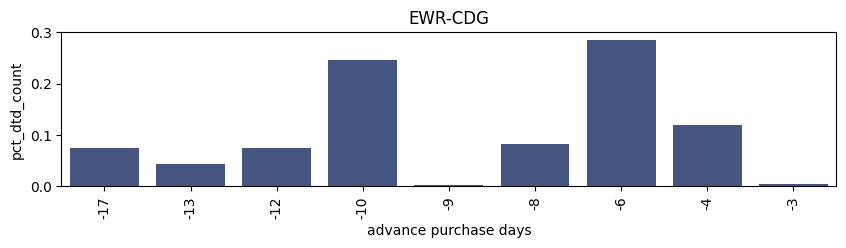

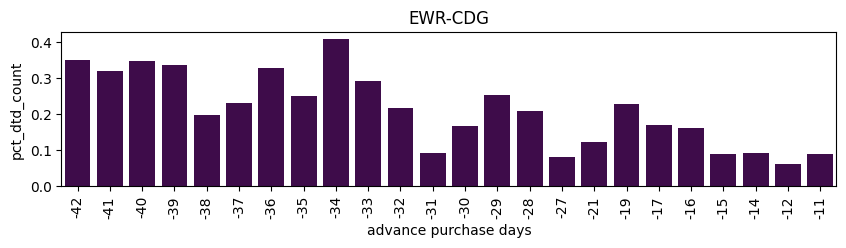

In [18]:
# for i, cxr in enumerate(plot_data[cxr_col].unique()):
#     cxr_data = plot_data[plot_data[cxr_col] == cxr]
#     plt.figure(figsize=(10,2))
#     sns.barplot(
#         cxr_data,
#         x=-cxr_data['days_til_dept'],
#         y='pct_dtd_count',
#         color=colors[i]
#     );
#     plt.xlabel("advance purchase days")
#     plt.xticks(rotation=90);
#     plt.title(market);

In [24]:
plot_data[plot_data[cxr_col] == 'AC']

,days_til_dept,out_cxr,count,dtd_rank,dtd_count,pct_dtd_count
12,3,AC,4,5.0,881,0.004540
19,4,AC,141,5.0,1181,0.119390
33,6,AC,274,2.0,958,0.286013
44,8,AC,63,5.0,766,0.082245
50,9,AC,1,5.0,565,0.001770
57,10,AC,344,2.0,1400,0.245714
72,12,AC,163,4.0,2198,0.074158
80,13,AC,56,5.0,1311,0.042715
106,17,AC,61,5.0,815,0.074847


In [27]:
plot_data[plot_data[cxr_col] == 'DL']

,days_til_dept,out_cxr,count,dtd_rank,dtd_count,pct_dtd_count
65,11,DL,125,4.0,1387,0.090123
73,12,DL,137,5.0,2198,0.062329
87,14,DL,151,4.0,1645,0.091793
92,15,DL,134,4.0,1487,0.090114
99,16,DL,193,3.0,1198,0.161102
107,17,DL,139,3.0,815,0.170552
118,19,DL,317,2.0,1391,0.227894
135,21,DL,189,4.0,1530,0.123529
180,27,DL,58,4.0,720,0.080556
190,28,DL,292,2.0,1396,0.209169


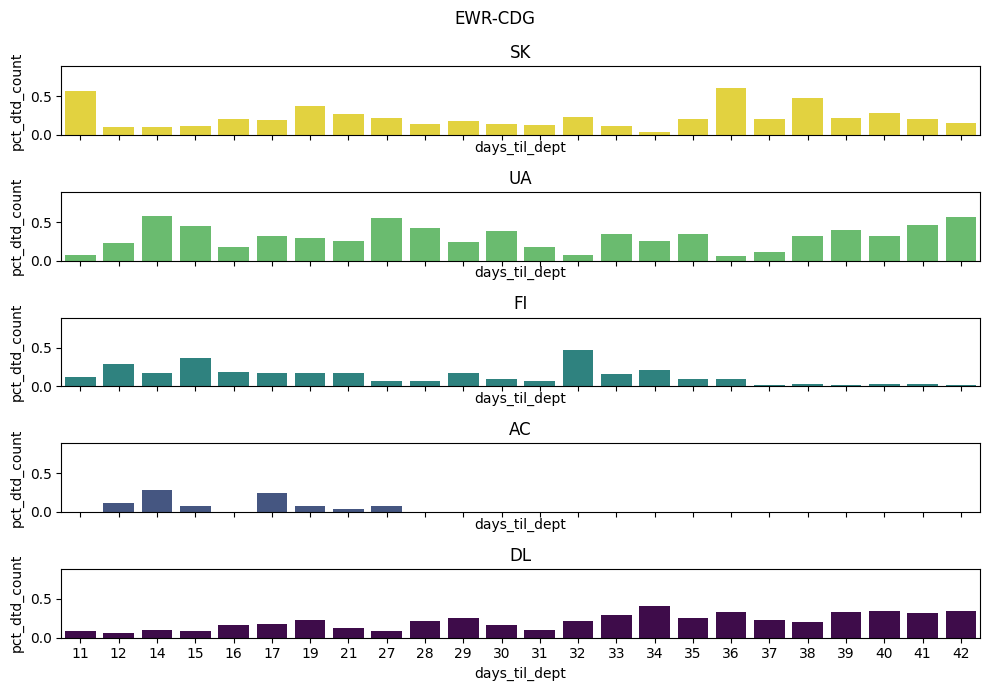

In [26]:
fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
    plt.subplot(top_n_cxr, 1, i+1)
    cxr_data = plot_data[plot_data[cxr_col] == cxr]
    sns.barplot(
        cxr_data,
        x='days_til_dept',
        y='pct_dtd_count',
        color=colors[i]
    );
    plt.title(cxr)
#     if i == top_n_cxr-1:
#         plt.xlabel("advance purchase days")
#         plt.xticks(rotation=90);
#     else:
#         plt.xlabel("")

fig.suptitle(market);
fig.tight_layout();

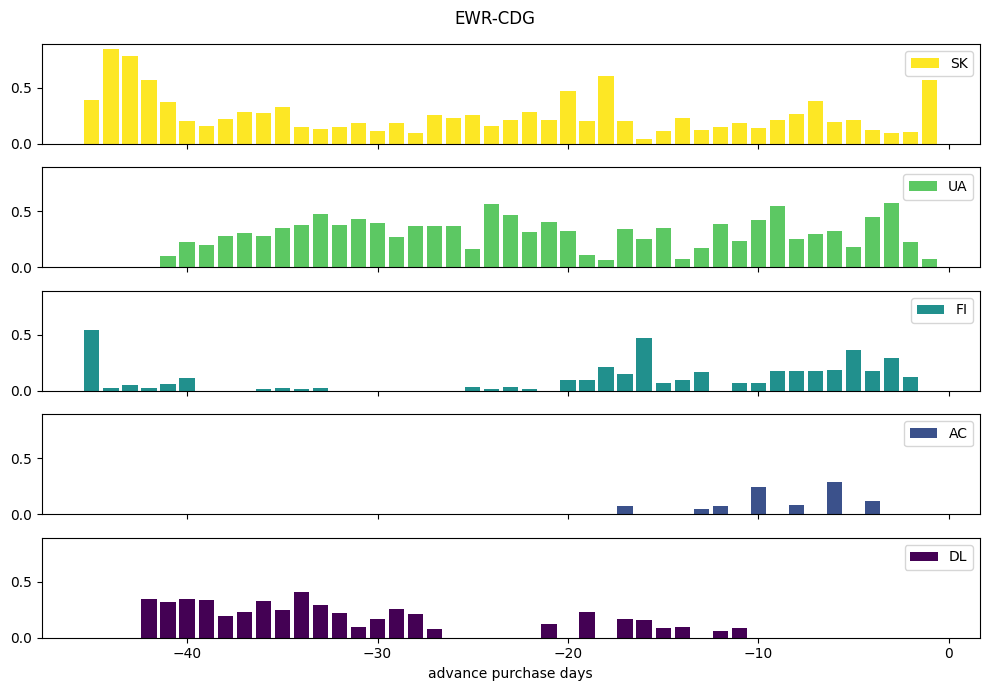

In [43]:
fig, axs = plt.subplots(top_n_cxr, 1, sharex=True, sharey=True, figsize=(10,7))
for i, cxr in enumerate(plot_data[cxr_col].unique()):
#     plt.subplot(top_n_cxr, 1, i+1)
    cxr_data = plot_data[plot_data[cxr_col] == cxr]

    axs[i].bar(-cxr_data['days_til_dept'], cxr_data['pct_dtd_count'], color=colors[i], label=cxr)
#     axs[i].set_title(cxr)
    axs[i].legend()
    if i == top_n_cxr-1:
        axs[i].set_xlabel("advance purchase days")
#         axs[i].set_xticklabels(cxr_data['days_til_dept'][::3], rotation=90);
    else:
        plt.xlabel("")

fig.suptitle(market);
fig.tight_layout();

## DOW

In [10]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

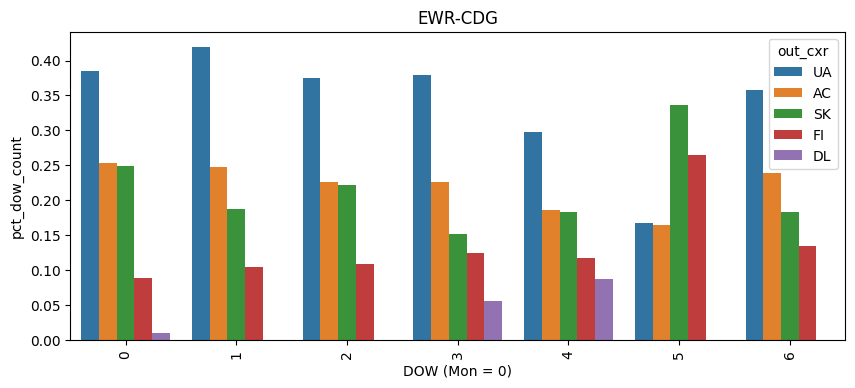

In [11]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# one-ways - including inter-line

In [13]:
data_idx = 1
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

m_df = df[df['market'] == market]

In [15]:
df.head()

,market,round_trip,days_til_dept,out_dt_dow_int,in_dt_dow_int,out_uni_cxr_concat,count,count_market,pct_count,cum_pct
0,JFK-LHR,0,61,5,NaN,TP,3288,1284485,0.002560,0.002560
1,JFK-LHR,0,60,4,NaN,TP,3214,1284485,0.002502,0.005062
2,JFK-LHR,0,65,2,NaN,TP,3107,1284485,0.002419,0.007481
3,JFK-LHR,0,2,6,NaN,DL,2961,1284485,0.002305,0.009786
4,JFK-LHR,0,66,2,NaN,TP,2849,1284485,0.002218,0.012004


In [16]:
cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

In [ ]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

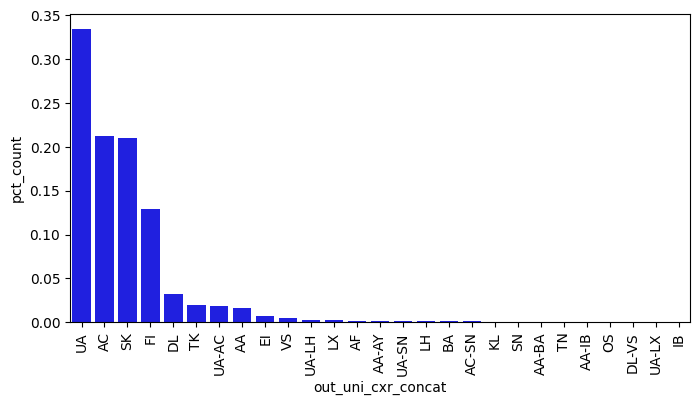

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [23]:
top_n_cxr = 5
top_cxr = cxr_summary.loc[:(top_n_cxr-1), 'out_uni_cxr_concat'].to_list()

## DTD

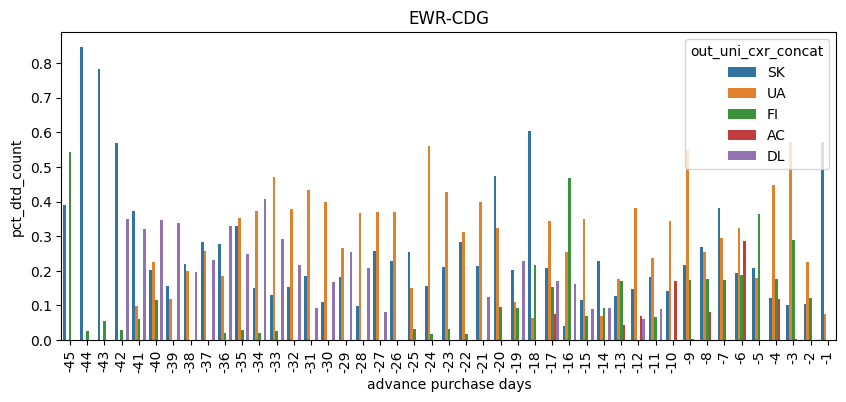

In [24]:
dtd_grp = m_df.groupby(["days_til_dept", "out_uni_cxr_concat"]).agg(
    {'count': 'sum',
    }
)

dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp['out_uni_cxr_concat'].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue='out_uni_cxr_concat'
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

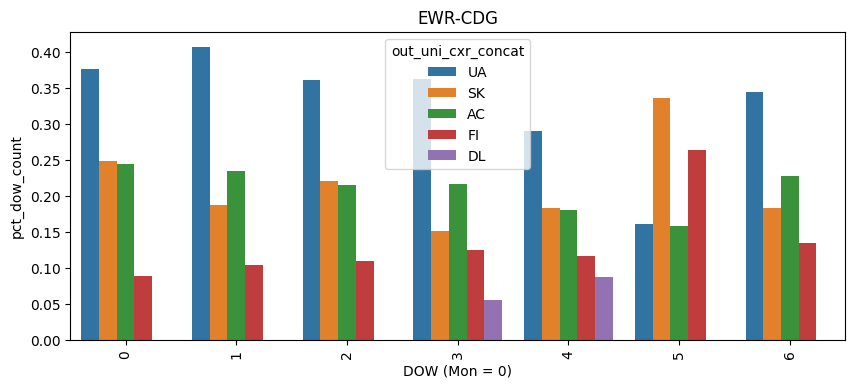

In [25]:
dow_grp = m_df.groupby(['out_dt_dow_int', 'out_uni_cxr_concat']).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=['out_dt_dow_int', 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby("out_dt_dow_int")['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby("out_dt_dow_int")['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp['out_uni_cxr_concat'].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x='out_dt_dow_int',
    y='pct_dow_count',
    hue='out_uni_cxr_concat'
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound

In [26]:
data_idx = 2
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

rt_out_cxr_crude


In [27]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

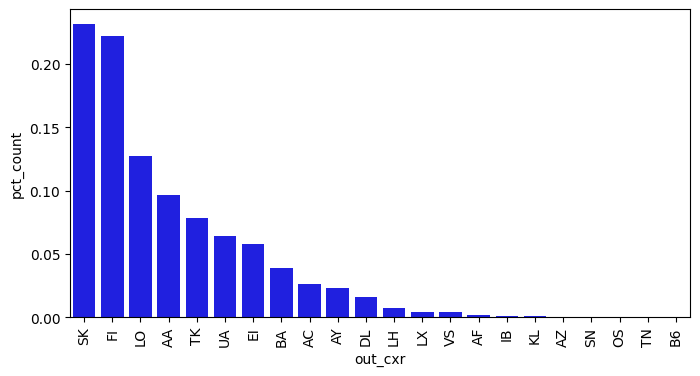

In [28]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [29]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

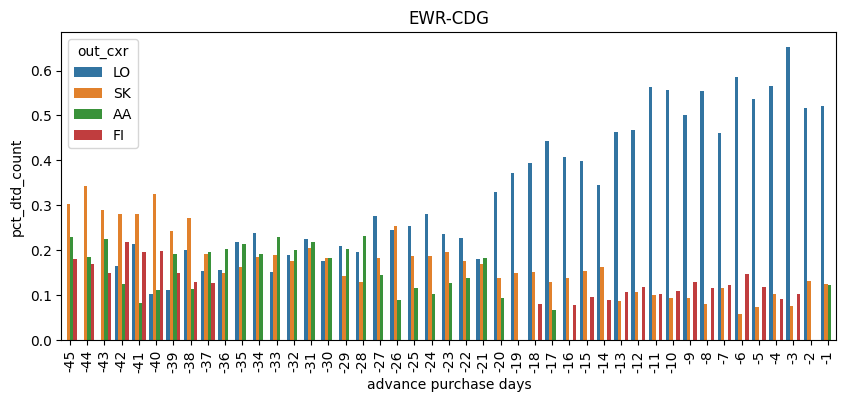

In [30]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [31]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

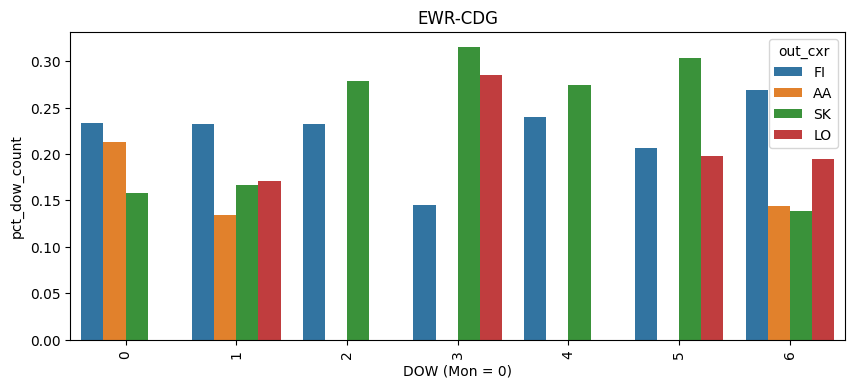

In [32]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound, including inter-lines

In [33]:
data_idx = 3
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

rt_out_cxr_nuanced


## overall summary by carrier

In [34]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

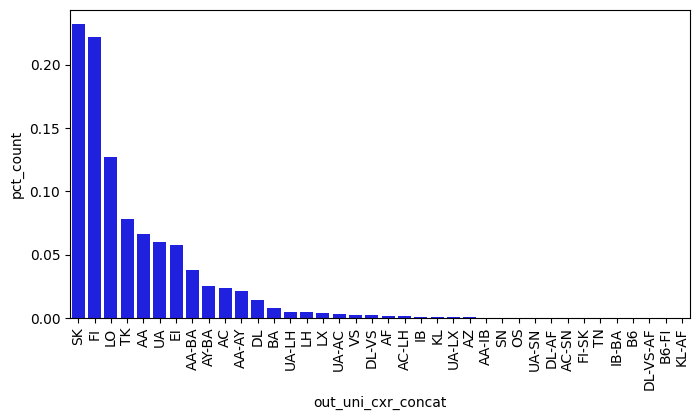

In [35]:
# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [36]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

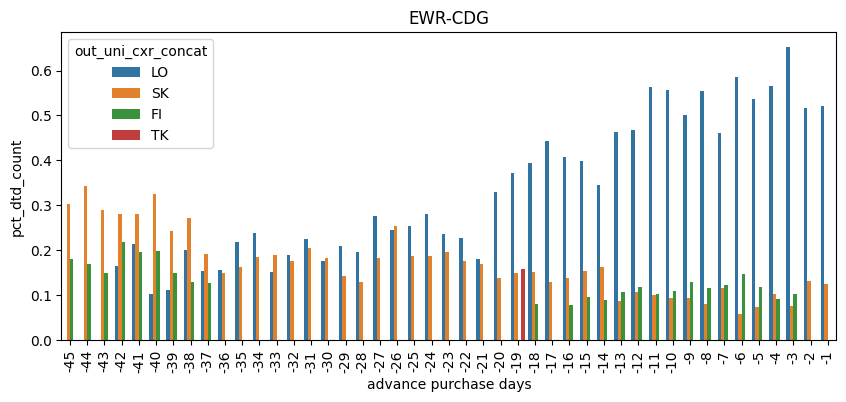

In [37]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [38]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

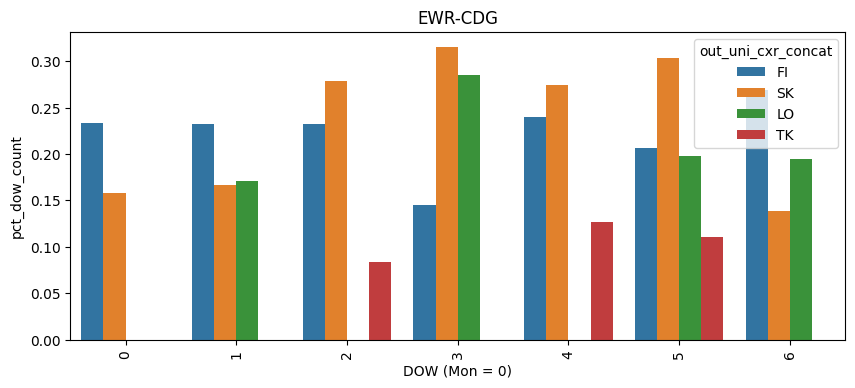

In [39]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, in-bound

In [40]:
data_idx = 4
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'in_cxr'
dow_col = 'in_dt_dow_int'

rt_in_cxr_crude


## overall summary by carrier

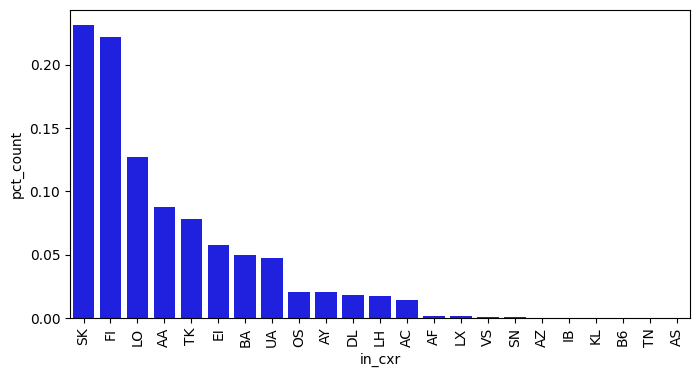

In [41]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [42]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

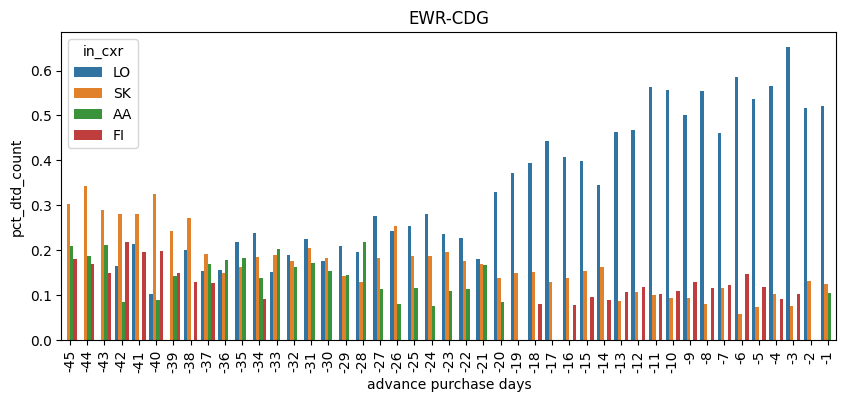

In [43]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

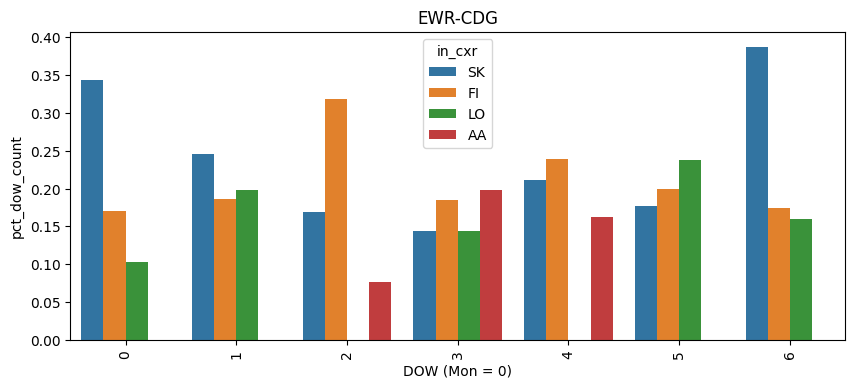

In [44]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# *next data type*

In [ ]:
data_idx = 
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

In [ ]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [ ]:
top_n_cxr = 3
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

In [ ]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [ ]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);